In [68]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

api = wandb.Api()


In [81]:
runs = [
    "chentianyi453/CSE256_PA1_DAN/cgkmqwad",
    "chentianyi453/CSE256_PA1_DAN/r3jf1yan",
]
data = [api.run(run).history() for run in runs]

In [82]:
def plot(run_indices, new_names, data):
    """
    run_indices: list[int], 1-based index of runs
    new_names: list[str], legend names
    data: list[pd.DataFrame], one DataFrame per run
    """

    assert len(run_indices) == len(new_names), \
        "run_indices and new_names must have the same length"

    metrics = [
        ("train/loss", "train_loss"),
        ("train/accuracy", "train_acc"),
        ("dev/loss", "dev_loss"),
        ("dev/accuracy", "dev_acc"),
    ]

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for ax, (col_name, title) in zip(axes, metrics):
        for idx, name in zip(run_indices, new_names):
            run_idx = idx - 1  # 1-based -> 0-based
            assert 0 <= run_idx < len(data), f"run index {idx} out of range"

            df = data[run_idx]
            assert col_name in df.columns, f"{col_name} not found in run {idx}"

            step = df.index
            values = df[col_name]

            ax.plot(step, values, label=name)

        ax.set_title(title)
        ax.set_xlabel("Step")
        ax.set_ylabel(title)
        ax.grid(True)

    # 只放一个全局 legend，避免重复
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=len(new_names))

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [83]:
names = [api.run(run).name for run in runs]
run_indices = [idx+1 for idx in range(len(runs))]
names

['Random Embedding', 'Pretrained Embedding']

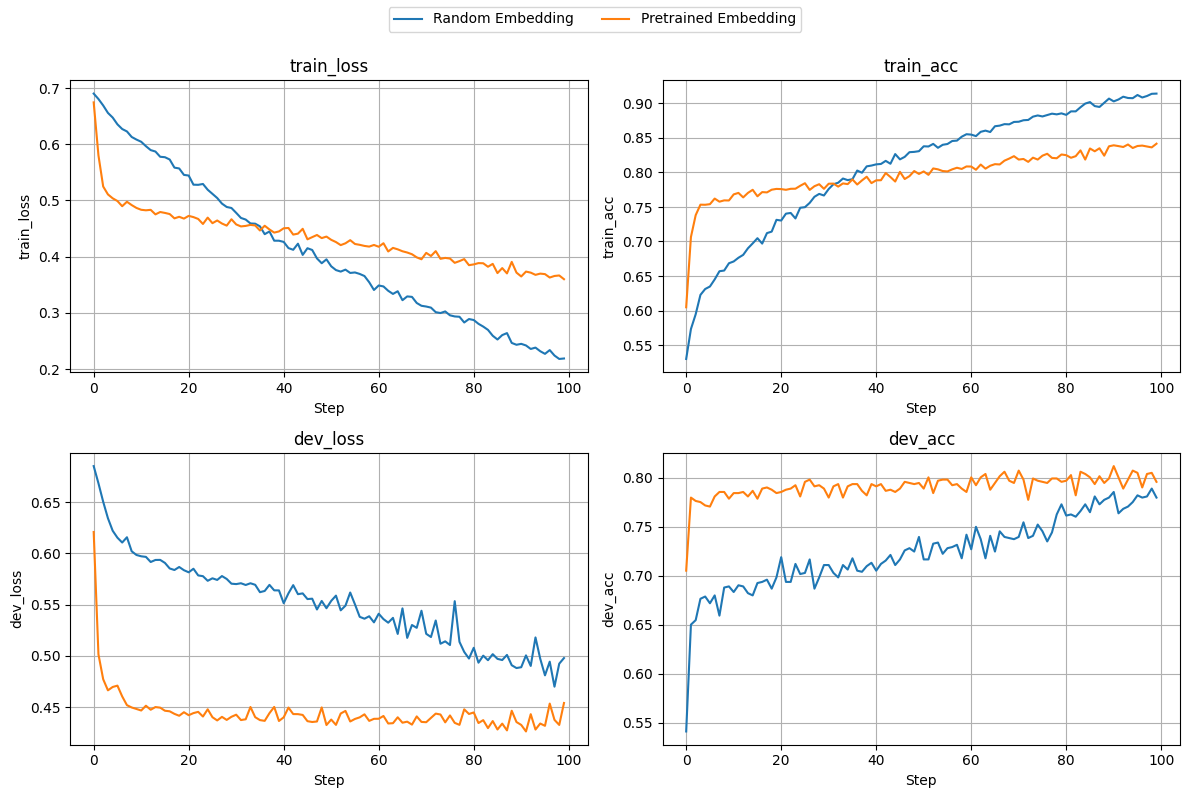

In [84]:
plot(
    run_indices=run_indices,
    new_names=names,
    data=data
)